## Import Modules

In [1]:
import glob 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys, os, nilearn
from nilearn import input_data, datasets
from nilearn import plotting


c:\users\shelby\anaconda3\envs\shelby_neuroimaging\lib\site-packages\nilearn\datasets\__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


# Set up masker

In [ ]:
shen_file       = '../data_realcost/masker/shen_2mm_268_parcellation.nii'

shen_masker = input_data.NiftiLabelsMasker(shen_file, 
                                             detrend     = True, 
                                             standardize = True,
                                             high_pass   = 0.01, 
                                             t_r         = 1.0,  #check!
                                             low_pass    = 0.12 );


nilearn.plotting.plot_roi(shen_file, title='Our mask');

combined      = '../data_realcost/masker/allcombined.nii'

all293_masker = input_data.NiftiLabelsMasker(combined, 
                                             detrend     = True, 
                                             standardize = True,
                                             high_pass   = 0.01, 
                                             t_r         = 1.0,  #check!
                                             low_pass    = 0.12 );

# Function to vary mask/atlas and vary filter properties 

NiftiLabelsMasker(detrend='True', high_pass='0.01',
                  labels_img='../data_realcost/masker/allcombined.nii',
                  low_pass='0.12', standardize='True', t_r='2.0')

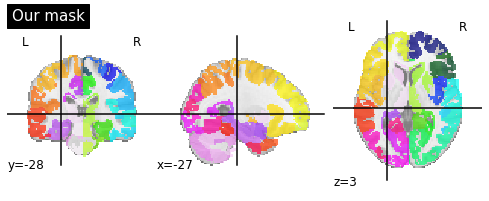

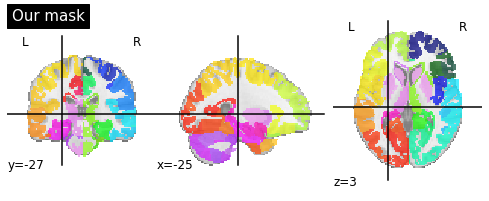

In [12]:
def choose_mask(file,detrnd="True",stndrd="True",hp="0.01",tr="1.0",lp="0.12"):
    '''
    give the file name, the file must be a nifty (nii)
    you can then chose whether to 
    detrend the data (true or false), dtrnd = , default: True
    standardize the data (true or false), stndrd = , default: True
    set high_pass filter,  hp = , default: .01
    give the t_r in secs, tr =, default:  1
    and set low_pass, lp = , default:  .12  
    '''
    
    mask  = '../data_realcost/masker/'+ file +'.nii'
    
    masker = input_data.NiftiLabelsMasker(mask, 
                                             detrend     = detrnd, 
                                             standardize = stndrd,
                                             high_pass   = hp, 
                                             t_r         = tr, 
                                             low_pass    = lp );
    
    nilearn.plotting.plot_roi(mask, title='Our mask');
        
    return masker

choose_mask('shen_2mm_268_parcellation')
choose_mask('allcombined')

# Load the data and then save it as numpy arrays with the mask applied

In [9]:
raw_data_path = 'D:/SHELBY_DATA/REALCOST/data/00_func_data/niis'
motion_data_path = 'D:/SHELBY_DATA/REALCOST/data/00_func_data/motion/'
subjs = [f for f in os.listdir(raw_data_path)]
print(subjs[35]) #weird file loaded in. Doesn't exist in directory though so needs to be deleted.
subjs.remove(subjs[35])
print(subjs[35]) #check that file deleted
n_subjs = len(subjs) #length should be 40
n_subjs

._PSA017_swrealcost_run01_st.nii
PSA029_swrealcost_run01_st.nii


40

In [ ]:
for curr_subject in subjs:
    print(curr_subject)
    data_file =  raw_data_path + curr_subject 
    motion_file = motion_data_path + curr_subject + '_rp_realcost_run01_st.txt'
    
    time_series = mask.fit_transform(data_file, confounds = motion_file)
    outname = '../data_realcost/' + curr_subject + '_shen_extracted_hp001_lp012_ltr_stand.npy'
    return np.save(outname , time_series)

In [14]:
##subjs
def mask_extract(mask, filename, subjs, raw_data_path, motion_data_path):
    for curr_subject in subjs:
        print(curr_subject)
        data_file =  raw_data_path + curr_subject 
        motion_file = motion_data_path + curr_subject + '_rp_realcost_run01_st.txt'
    
        time_series = mask.fit_transform(data_file, confounds = motion_file)
        outname = '../data_realcost/' + curr_subject + '_'+ filename +'_hp001_lp012_ltr_stand.npy'
        return np.save(outname , time_series)

PSA038_swrealcost_run01_st.nii
PSA009_swrealcost_run01_st.nii
PSA078_swrealcost_run01_st.nii
PSA153_swrealcost_run01_st.nii
PSA131_swrealcost_run01_st.nii
PSA086_swrealcost_run01_st.nii
PSA144_swrealcost_run01_st.nii
PSA108_swrealcost_run01_st.nii
PSA030_swrealcost_run01_st.nii
PSA041_swrealcost_run01_st.nii
PSA068_swrealcost_run01_st.nii
PSA056_swrealcost_run01_st.nii
PSA132_swrealcost_run01_st.nii
PSA019_swrealcost_run01_st.nii
PSA027_swrealcost_run01_st.nii
PSA028_swrealcost_run01_st.nii
PSA016_swrealcost_run01_st.nii
PSA005_swrealcost_run01_st.nii
PSA061_swrealcost_run01_st.nii
PSA010_swrealcost_run01_st.nii
PSA128_swrealcost_run01_st.nii
PSA003_swrealcost_run01_st.nii
PSA156_swrealcost_run01_st.nii
PSA119_swrealcost_run01_st.nii
PSA032_swrealcost_run01_st.nii
PSA127_swrealcost_run01_st.nii
PSA079_swrealcost_run01_st.nii
PSA094_swrealcost_run01_st.nii
PSA008_swrealcost_run01_st.nii
PSA036_swrealcost_run01_st.nii
PSA112_swrealcost_run01_st.nii
PSA007_swrealcost_run01_st.nii
PSA151_s

In [ ]:
res_img  = shen_masker.inverse_transform(r2);
plotting.plot_glass_brain(nilearn.image.index_img(res_img,0), 
                          colorbar=True, 
                          annotate = True,
                          cmap="Blues", 
                          threshold=0.15,
                          plot_abs=False, 
                         );

In [13]:
from scipy.stats import pearsonr, zscore

def camcan_isc(data, pairwise=False, summary_statistic=None, verbose=True):
    """Intersubject correlation
    For each voxel or ROI, compute the Pearson correlation between each
    subject's response time series and other subjects' response time series.
    If pairwise is False (default), use the leave-one-out approach, where
    correlation is computed between each subject and the average of the other
    subjects. If pairwise is True, compute correlations between all pairs of
    subjects. If summary_statistic is None, return N ISC values for N subjects
    (leave-one-out) or N(N-1)/2 ISC values for each pair of N subjects,
    corresponding to the upper triangle of the pairwise correlation matrix
    (see scipy.spatial.distance.squareform). Alternatively, supply either
    np.mean or np.median to compute summary statistic of ISCs (Fisher Z will
    be applied and inverted if using mean). Input data should be a list 
    where each item is a time-points by voxels ndarray for a given subject.
    Multiple input ndarrays must be the same shape. If a single ndarray is
    supplied, the last dimension is assumed to correspond to subjects. If 
    only two subjects are supplied, simply compute Pearson correlation
    (precludes averaging in leave-one-out approach, and does not apply
    summary statistic.) Output is an ndarray where the first dimension is
    the number of subjects or pairs and the second dimension is the number
    of voxels (or ROIs).
        
    The implementation is based on the following publication:
    
    .. [Hasson2004] "Intersubject synchronization of cortical activity 
    during natural vision.", U. Hasson, Y. Nir, I. Levy, G. Fuhrmann,
    R. Malach, 2004, Science, 303, 1634-1640.
    Parameters
    ----------
    data : list or ndarray
        fMRI data for which to compute ISC
        
    pairwise : bool, default: False
        Whether to use pairwise (True) or leave-one-out (False) approach
        
    summary_statistic : None
        Return all ISCs or collapse using np.mean or np.median
    Returns
    -------
    iscs : subjects or pairs by voxels ndarray
        ISC for each subject or pair (or summary statistic) per voxel
    """
    
    # Convert list input to 3d and check shapes
    if type(data) == list:
        data_shape = data[0].shape
        for i, d in enumerate(data):
            if d.shape != data_shape:
                raise ValueError("All ndarrays in input list "
                                 "must be the same shape!")
            if d.ndim == 1:
                data[i] = d[:, np.newaxis]
        data = np.dstack(data)

    # Convert input ndarray to 3d and check shape
    elif type(data) == np.ndarray:
        if data.ndim == 2:
            data = data[:, np.newaxis, :]            
        elif data.ndim == 3:
            pass
        else:
            raise ValueError("Input ndarray should have 2 "
                             f"or 3 dimensions (got {data.ndim})!")

    # Infer subjects, TRs, voxels and print for user to check
    n_subjects = data.shape[2]
    n_TRs = data.shape[0]
    n_voxels = data.shape[1]
    if verbose:
        print(f"Assuming {n_subjects} subjects with {n_TRs} time points "
              f"and {n_voxels} voxel(s) or ROI(s).")
    
    # Loop over each voxel or ROI
    voxel_iscs = []
    for v in np.arange(n_voxels):
        voxel_data = data[:, v, :].T
        if n_subjects == 2:
            iscs = pearsonr(voxel_data[0, :], voxel_data[1, :])[0]
            summary_statistic = None
            if verbose:
                print("Only two subjects! Simply computing Pearson correlation.")
        elif pairwise:
            iscs = squareform(np.corrcoef(voxel_data), checks=False)
        elif not pairwise:
            iscs = np.array([pearsonr(subject,
                                      np.mean(np.delete(voxel_data,
                                                        s, axis=0),
                                              axis=0))[0]
                    for s, subject in enumerate(voxel_data)])
        voxel_iscs.append(iscs)
    iscs = np.column_stack(voxel_iscs)
    
    # Summarize results (if requested)
    if summary_statistic == np.mean:
        iscs = np.tanh(summary_statistic(np.arctanh(iscs), axis=0))[np.newaxis, :]
    elif summary_statistic == np.median:    
        iscs = summary_statistic(iscs, axis=0)[np.newaxis, :]
    elif not summary_statistic:
        pass
    else:
        raise ValueError("Unrecognized summary_statistic! Use None, np.median, or np.mean.")
    return iscs